#Ejercicio 5

#1
##a) Analíticamente
$$X \sim Tri(a,b, c)$$\
$$Tri(190,210,230)$$\
$$f(x)\begin{cases}
\frac{1}{400} (x-190) \ &\text{si } 190 \leq x < 210 \\-
\frac{1}{400} (x-230) \ &\text{si } 210 \leq x \leq 230
\end{cases}$$

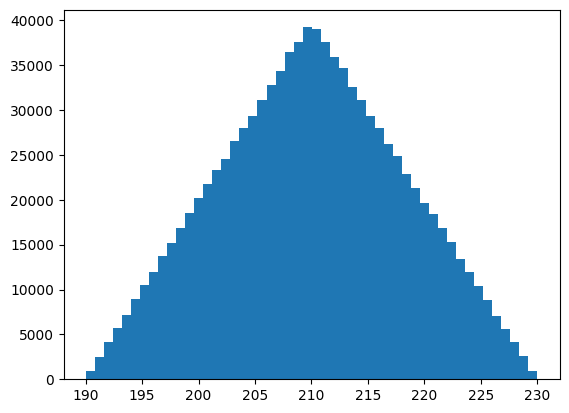

In [44]:
plt.hist(D,bins=50)
plt.show()

Calculamos la media
$$\mu = E[x]= \int_{190}^{230}xf(x)dx$$

$$\int_{190}^{210}x\frac{x-190}{400}dx$$
$$-\int_{210}^{230}x\frac{x-230}{400}dx=$$

$$\frac{1}{400}\int_{190}^{210}(x²-190x)dx-\frac{1}{400}\int_{210}^{230}(x²-230x)dx=$$

$$\frac{1}{400}(\frac{x^{3}}{3}-95x^{2}|_{190}^{210})-\frac{1}{400}(\frac{x³}{3}-115x^{2}|_{210}^{230})=$$

$$\frac{305}{3}+\frac{325}{3}=210=E[x]$$

Calculamos la varianza
$$\sigma^2=Var(x)=\int_{190}^{230}(x-210)^{2}f(x)dx$$

$$\int_{190}^{210}(x-210)^{2}(\frac{x-190}{400})dx$$
$$-\int_{210}^{230}(x-210)^{2}(\frac{x-230}{400})dx=$$

$$\frac{1}{400}(\frac{x^{4}}{4}-\frac{610x³}{3}+61950x^{2}-8379000|_{190}^{210})-\frac{1}{400}(\frac{x^{4}}{4}-\frac{650x³}{3}+70350x^{2}-10143000|_{210}^{230})=$$

$$\frac{100}{3}+\frac{100}{3}=\frac{200}{3}\approx{66}.\overline{6}=\sigma^2$$

Queremos calcular
$$P(x_1+x_2+x_3+x_4+x_5>1000)$$
Usamos el teorema fundamental del límite. \
$$\lim_{n\to\infty}P(\frac{x_1+x_2+x_3+x_4+x_5}{\sigma\sqrt{n}}<x)=\phi(x)$$

Escribimos\
$$\frac{x_1+x_2+x_3+x_4+x_5-5(210)}{\sqrt{\frac{200}{3}}\sqrt{5}}>\frac{1000-5(210)}{\sqrt{\frac{200}{3}}\sqrt{5}}$$
Simplificamos\
$$\frac{x_1+x_2+x_3+x_4+x_5-5(210)}{\sqrt{\frac{200(5)}{3}}}>-2.73$$

Y sustituimos en el teorema:\
$$P(z<-2.73)=\phi(-2.73)$$
$$P(x_1+x_2+x_3+x_4+x_5>1000)$$
$$=1-\phi(-2.73)=$$
$$0.997=99.7\%$$

In [33]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

In [39]:
mu = 210
sigma = np.sqrt(200/3)
# Rangos
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = norm.pdf(x, mu, sigma)
# Valor z
z = -2.73
x_z = mu + z * sigma

In [40]:
# Calculando las probabilidades
p_z_menor = norm.cdf(x_z, mu, sigma)
p_complemento = 1 - p_z_menor

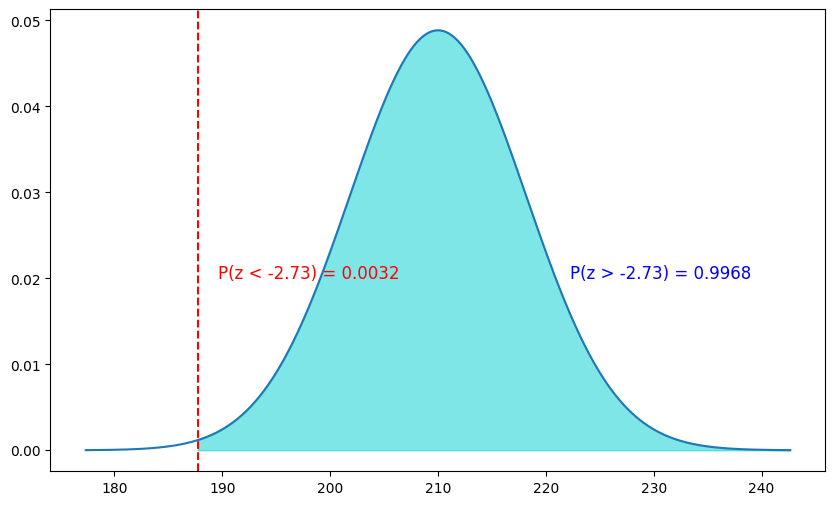

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Distribución Normal')
plt.fill_between(x, 0, y, where=(x >= x_z), color='darkturquoise', alpha=0.5, label=f'P(z > {z})')
plt.axvline(x=x_z, color='red', linestyle='--', label=f'z = {z}')
#Probabilidades en el gráfico
plt.text(mu - 2.5*sigma, 0.02, f'P(z < {z}) = {p_z_menor:.4f}', fontsize=12, color='red')
plt.text(mu + 1.5*sigma, 0.02, f'P(z > {z}) = {p_complemento:.4f}', fontsize=12, color='blue')

plt.show()

##b) Por simulación
Calculamos $F(x)=\int_{-∞}^{∞}f(s)ds$
$$F(x)\begin{cases}
\frac{(x-190)^2}{800}\ &\text{si } 190 \leq x < 210 \\
1-\frac{(230-x)^2}{800} \ &\text{si } 210 \leq x \leq 230
\end{cases}$$

In [ ]:
import random as rnd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
def ejercicio_5(n=1000000,a=190,b=210,c=230):
 lista=[]
 for i in range(n):
  u=rnd.random()
  if 0<=u<(b-a)/(c-a):
   x=190+np.sqrt(800*u)
   lista.append(x)
  else:
   x=c-np.sqrt(800*(1-u))
   lista.append(x)
 return lista

In [43]:
D=ejercicio_5()

In [45]:
def cdf(muestra):
 n=len(muestra)
 x=np.sort(muestra)
 y=np.arange(0, n) /n
 return x,y

In [46]:
x, y=cdf(D)

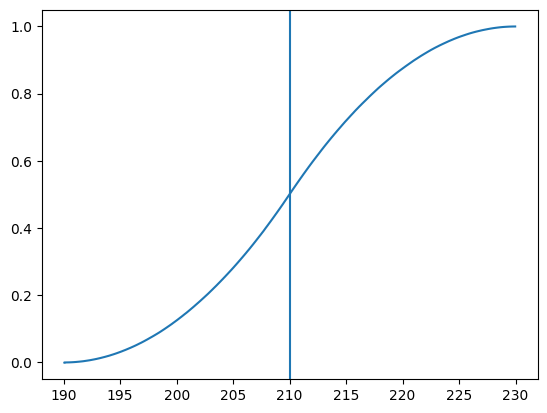

In [48]:
plt.step(x, y)
plt.axvline(210)
plt.show()

In [49]:
def sim_tinas(N,D):
 lista1=[]
 contador=0
 for i in range(N):
  U=rnd.sample(D, 5)
  if sum(U) >1000:
   contador+=1
   prob=contador/(i+1)
   lista1.append(prob)
 return lista1

In [50]:
M=sim_tinas(100000,D)

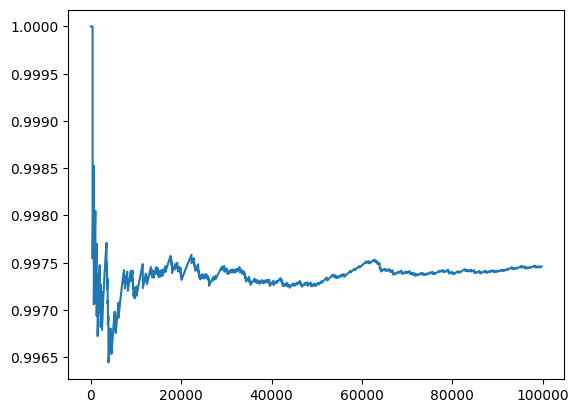

In [51]:
plt.plot(M)

In [52]:
pr=sum(M)/len(M)
print(pr)

0.9973756961278468


#2
##a)Analíticamente
En un año se trabaja 5 días en 52 semanas. En total 260 días se laboran.
El dato anteriormente calculado, $99.7\%$, es el porcentaje de días que al fabricar 5 tinas, estas exceden 1 tonelada
$$260\ días \to 100\%$$
$$x\ días \to 99.7\%$$
Por tanto $x=259\ días$\
El costo anual al rentar un camión es
$$costo=259×200=$51800$$
Por otro lado, está la opción de comprar un camión, con un costo anual de $\$60000$.

Comparando, conviene Rentar un camión

##b) Por Simulación
1. Simular el peso de 5 tinas
2. Si el peso de las 5 tinas rebasa la capacidad del camión, sumar 200 al costo. Repetir para 260 días
3. Determinar el costo. Repetir para N años
4. Calcular el promedio del costo anual

In [53]:
def sim_tinas2(N,D):
 lista2=[]
 for i in range(N):
  costo=0
  for j in range(260):
   U=rnd.sample(D, 5)
   if sum(U) >1000:
    costo+=200
  lista2.append(costo)
 return lista2

In [71]:
S=sim_tinas2(100,D)

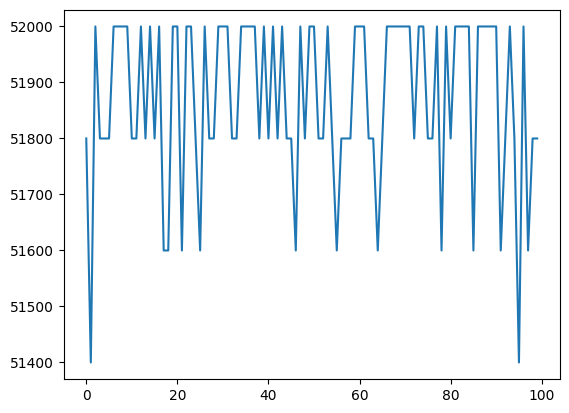

In [72]:
plt.plot(S)
plt.show()

In [73]:
pro=sum(S)/len(S)
if pro<60000:
  print("Conviene rentar un camión, a un costo promedio anual de: ",pro)
else:
  print("Conviene comprar el camión")

Conviene rentar un camión, a un costo promedio anual de:  51872.0
